In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# global imports
import os
import shutil
# torch imports
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
import torchvision

import matplotlib.pyplot as plt

# local imports
from train import train_model
from dataset import KTHDataset
from models import MySequentialClassifier, SequentialClassifier
from utils.count_model_params import count_model_params

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

True


In [51]:
# global constant definitions
EPOCHS = 100
LR = 1e-3

In [5]:
KTH_CLASSES = ['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking']

In [6]:
BASE_LOG_DIR = os.path.join(os.getcwd(), "tboard_logs")
DATA_FOLDER = '/home/nfs/inf6/data/datasets/kth_actions/raw'

os.makedirs(BASE_LOG_DIR, exist_ok=True)

## Task 1

In [24]:
train_dataset = KTHDataset(root_dir=DATA_FOLDER, train=True)
test_dataset = KTHDataset(root_dir=DATA_FOLDER, train=False)

In [25]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

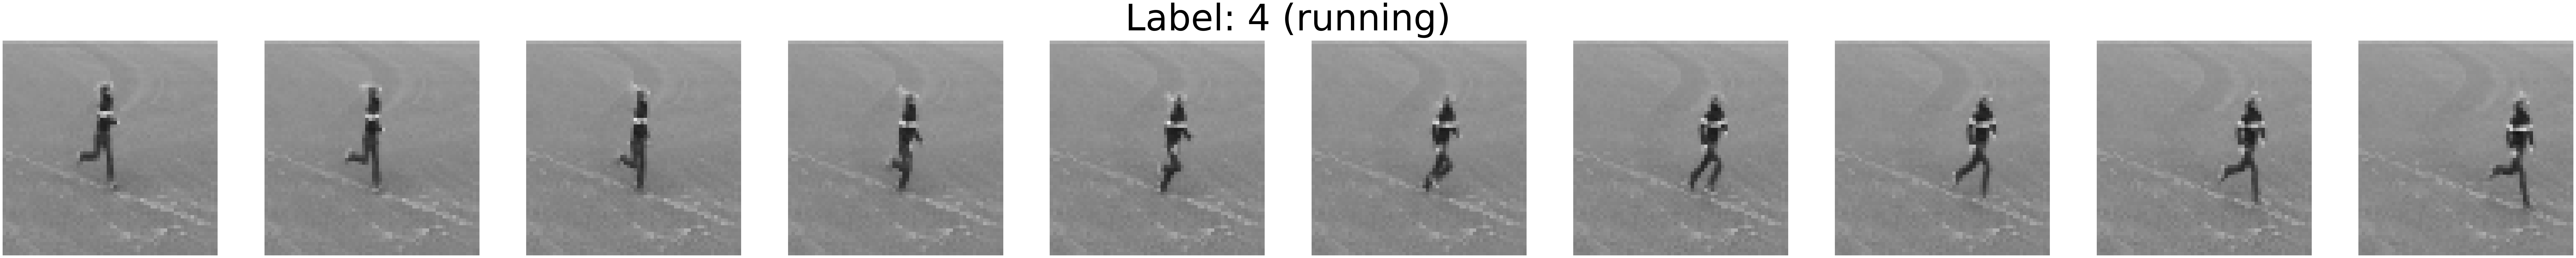

In [26]:
frames, label = dataset[191]

num_frames = frames.shape[0]
fig, axes = plt.subplots(1, num_frames, figsize=(num_frames * 10, 10))

for i in range(num_frames):
    frame = frames[i]  #[3, 64, 64]
    frame_np = frame.permute(1, 2, 0).numpy()  #[H, W, C] для plt
    axes[i].imshow(frame_np)
    axes[i].axis('off')
fig.suptitle(f"Label: {label} ({KTH_CLASSES[label]})", fontsize=100)
plt.tight_layout()
plt.show()

In [60]:
model = MySequentialClassifier(emb_dim=128, hidden_dim=128, num_layers=2, mode="zeros")
model = model.to(device)
count_model_params(model)

Learnable parameters: 487,558
Total parameters: 487,558


(487558, 487558)

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)

In [62]:
TBOARD_LOGS = os.path.join(BASE_LOG_DIR, "LSTM implementation")
os.makedirs(TBOARD_LOGS, exist_ok=True)

shutil.rmtree(TBOARD_LOGS)
writer = SummaryWriter(TBOARD_LOGS)

In [63]:
train_loss, val_loss, loss_iters, valid_acc = train_model(
        model=model, optimizer=optimizer, scheduler=scheduler, criterion=criterion,
        train_loader=train_loader, valid_loader=test_loader, num_epochs=EPOCHS, device=device, logger=writer.add_scalar
    )

  0%|                                                                                                           | 0/100 [00:00<?, ?it/s][mpeg4 @ 0x48102f80] ac-tex damaged at 8 6
[mpeg4 @ 0x48102f80] Error at MB: 74
  1%|▉                                                                                                  | 1/100 [00:10<17:24, 10.55s/it]

Epoch 1/100
    Train loss: 1.80866
    Valid loss: 1.80437
    Accuracy: 13.333333333333334%




[mpeg4 @ 0x481da800] ac-tex damaged at 8 6
[mpeg4 @ 0x481da800] Error at MB: 74
  2%|█▉                                                                                                 | 2/100 [00:21<17:14, 10.55s/it][mpeg4 @ 0x47db7d80] ac-tex damaged at 8 6
[mpeg4 @ 0x47db7d80] Error at MB: 74
  3%|██▉                                                                                                | 3/100 [00:31<17:04, 10.56s/it][mpeg4 @ 0x46e28040] ac-tex damaged at 8 6
[mpeg4 @ 0x46e28040] Error at MB: 74
  4%|███▉                                                                                               | 4/100 [00:42<16:57, 10.60s/it][mpeg4 @ 0x48129300] ac-tex damaged at 8 6
[mpeg4 @ 0x48129300] Error at MB: 74
  5%|████▉                                                                                              | 5/100 [00:52<16:45, 10.59s/it][mpeg4 @ 0x47db7d80] ac-tex damaged at 8 6
[mpeg4 @ 0x47db7d80] Error at MB: 74
  6%|█████▉                                             

Epoch 6/100
    Train loss: 1.78913
    Valid loss: 1.80163
    Accuracy: 18.333333333333332%




[mpeg4 @ 0x481e15c0] ac-tex damaged at 8 6
[mpeg4 @ 0x481e15c0] Error at MB: 74
  7%|██████▉                                                                                            | 7/100 [01:13<16:17, 10.51s/it][mpeg4 @ 0x48132d80] ac-tex damaged at 8 6
[mpeg4 @ 0x48132d80] Error at MB: 74
  8%|███████▉                                                                                           | 8/100 [01:24<16:12, 10.57s/it][mpeg4 @ 0x47db1600] ac-tex damaged at 8 6
[mpeg4 @ 0x47db1600] Error at MB: 74
  9%|████████▉                                                                                          | 9/100 [01:35<16:03, 10.59s/it][mpeg4 @ 0x47db9440] ac-tex damaged at 8 6
[mpeg4 @ 0x47db9440] Error at MB: 74
 10%|█████████▊                                                                                        | 10/100 [01:45<15:52, 10.58s/it][mpeg4 @ 0x46e28040] ac-tex damaged at 8 6
[mpeg4 @ 0x46e28040] Error at MB: 74
 11%|██████████▊                                        

Epoch 11/100
    Train loss: 1.80505
    Valid loss: 1.77189
    Accuracy: 24.166666666666668%




[mpeg4 @ 0x47d582c0] ac-tex damaged at 8 6
[mpeg4 @ 0x47d582c0] Error at MB: 74
 12%|███████████▊                                                                                      | 12/100 [02:07<15:58, 10.89s/it][mpeg4 @ 0x47db7d80] ac-tex damaged at 8 6
[mpeg4 @ 0x47db7d80] Error at MB: 74
 13%|████████████▋                                                                                     | 13/100 [02:18<15:48, 10.90s/it][mpeg4 @ 0x47db7d80] ac-tex damaged at 8 6
[mpeg4 @ 0x47db7d80] Error at MB: 74
 14%|█████████████▋                                                                                    | 14/100 [02:29<15:27, 10.79s/it][mpeg4 @ 0x47db1600] ac-tex damaged at 8 6
[mpeg4 @ 0x47db1600] Error at MB: 74
 15%|██████████████▋                                                                                   | 15/100 [02:40<15:14, 10.76s/it][mpeg4 @ 0x47d582c0] ac-tex damaged at 8 6
[mpeg4 @ 0x47d582c0] Error at MB: 74
 16%|███████████████▋                                   

Epoch 16/100
    Train loss: 1.796
    Valid loss: 1.81395
    Accuracy: 19.166666666666668%




[mpeg4 @ 0x47e3a1c0] ac-tex damaged at 8 6
[mpeg4 @ 0x47e3a1c0] Error at MB: 74
 17%|████████████████▋                                                                                 | 17/100 [03:05<16:17, 11.78s/it][mpeg4 @ 0x4737a0c0] ac-tex damaged at 8 6
[mpeg4 @ 0x4737a0c0] Error at MB: 74
 18%|█████████████████▋                                                                                | 18/100 [03:18<16:52, 12.34s/it][mpeg4 @ 0x476bb800] ac-tex damaged at 8 6
[mpeg4 @ 0x476bb800] Error at MB: 74
 19%|██████████████████▌                                                                               | 19/100 [03:32<17:08, 12.70s/it][mpeg4 @ 0x47e75d80] ac-tex damaged at 8 6
[mpeg4 @ 0x47e75d80] Error at MB: 74
 20%|███████████████████▌                                                                              | 20/100 [03:45<17:13, 12.91s/it][mpeg4 @ 0x4810f840] ac-tex damaged at 8 6
[mpeg4 @ 0x4810f840] Error at MB: 74
 21%|████████████████████▌                              

Epoch 21/100
    Train loss: 1.7816
    Valid loss: 1.81394
    Accuracy: 14.166666666666666%




[mpeg4 @ 0x48129300] ac-tex damaged at 8 6
[mpeg4 @ 0x48129300] Error at MB: 74
 22%|█████████████████████▌                                                                            | 22/100 [04:12<17:02, 13.12s/it][mpeg4 @ 0x4817da80] ac-tex damaged at 8 6
[mpeg4 @ 0x4817da80] Error at MB: 74
 23%|██████████████████████▌                                                                           | 23/100 [04:26<17:16, 13.47s/it][mpeg4 @ 0x48129300] ac-tex damaged at 8 6
[mpeg4 @ 0x48129300] Error at MB: 74
 24%|███████████████████████▌                                                                          | 24/100 [04:42<17:41, 13.97s/it][mpeg4 @ 0x4737a0c0] ac-tex damaged at 8 6
[mpeg4 @ 0x4737a0c0] Error at MB: 74
 25%|████████████████████████▌                                                                         | 25/100 [04:56<17:40, 14.14s/it][mpeg4 @ 0x4737a0c0] ac-tex damaged at 8 6
[mpeg4 @ 0x4737a0c0] Error at MB: 74
 26%|█████████████████████████▍                         

Epoch 26/100
    Train loss: 1.78625
    Valid loss: 1.80114
    Accuracy: 17.5%




[mpeg4 @ 0x4737a0c0] ac-tex damaged at 8 6
[mpeg4 @ 0x4737a0c0] Error at MB: 74
 27%|██████████████████████████▍                                                                       | 27/100 [05:24<16:57, 13.94s/it][mpeg4 @ 0x4737a0c0] ac-tex damaged at 8 6
[mpeg4 @ 0x4737a0c0] Error at MB: 74
 28%|███████████████████████████▍                                                                      | 28/100 [05:39<17:09, 14.30s/it][mpeg4 @ 0x47db1600] ac-tex damaged at 8 6
[mpeg4 @ 0x47db1600] Error at MB: 74
 29%|████████████████████████████▍                                                                     | 29/100 [05:53<16:51, 14.24s/it][mpeg4 @ 0x36eef000] ac-tex damaged at 8 6
[mpeg4 @ 0x36eef000] Error at MB: 74
 30%|█████████████████████████████▍                                                                    | 30/100 [06:07<16:24, 14.06s/it][mpeg4 @ 0x47d582c0] ac-tex damaged at 8 6
[mpeg4 @ 0x47d582c0] Error at MB: 74
 31%|██████████████████████████████▍                    

Epoch 31/100
    Train loss: 1.79116
    Valid loss: 1.79089
    Accuracy: 15.833333333333332%




[mpeg4 @ 0x48129300] ac-tex damaged at 8 6
[mpeg4 @ 0x48129300] Error at MB: 74
 32%|███████████████████████████████▎                                                                  | 32/100 [06:35<16:05, 14.20s/it][mpeg4 @ 0x481e15c0] ac-tex damaged at 8 6
[mpeg4 @ 0x481e15c0] Error at MB: 74
 33%|████████████████████████████████▎                                                                 | 33/100 [06:49<15:56, 14.28s/it][mpeg4 @ 0x4817e2c0] ac-tex damaged at 8 6
[mpeg4 @ 0x4817e2c0] Error at MB: 74
 34%|█████████████████████████████████▎                                                                | 34/100 [07:05<16:08, 14.67s/it][mpeg4 @ 0x47db1600] ac-tex damaged at 8 6
[mpeg4 @ 0x47db1600] Error at MB: 74
 35%|██████████████████████████████████▎                                                               | 35/100 [07:20<15:51, 14.63s/it][mpeg4 @ 0x4737a0c0] ac-tex damaged at 8 6
[mpeg4 @ 0x4737a0c0] Error at MB: 74
 36%|███████████████████████████████████▎               

Epoch 36/100
    Train loss: 1.79703
    Valid loss: 1.81325
    Accuracy: 11.666666666666666%




[mpeg4 @ 0x46e28040] ac-tex damaged at 8 6
[mpeg4 @ 0x46e28040] Error at MB: 74
 37%|████████████████████████████████████▎                                                             | 37/100 [07:48<15:14, 14.52s/it][mpeg4 @ 0x476bb800] ac-tex damaged at 8 6
[mpeg4 @ 0x476bb800] Error at MB: 74
 38%|█████████████████████████████████████▏                                                            | 38/100 [08:04<15:23, 14.89s/it][mpeg4 @ 0x481da800] ac-tex damaged at 8 6
[mpeg4 @ 0x481da800] Error at MB: 74
 39%|██████████████████████████████████████▏                                                           | 39/100 [08:18<14:49, 14.58s/it][mpeg4 @ 0x481da800] ac-tex damaged at 8 6
[mpeg4 @ 0x481da800] Error at MB: 74
 40%|███████████████████████████████████████▏                                                          | 40/100 [08:33<14:42, 14.70s/it][mpeg4 @ 0x481e0a00] ac-tex damaged at 8 6
[mpeg4 @ 0x481e0a00] Error at MB: 74
 41%|████████████████████████████████████████▏          

Epoch 41/100
    Train loss: 1.79847
    Valid loss: 1.79443
    Accuracy: 20.0%




[mpeg4 @ 0x46e28040] ac-tex damaged at 8 6
[mpeg4 @ 0x46e28040] Error at MB: 74
 42%|█████████████████████████████████████████▏                                                        | 42/100 [09:10<16:01, 16.58s/it][mpeg4 @ 0x4815cf80] ac-tex damaged at 8 6
[mpeg4 @ 0x4815cf80] Error at MB: 74
 43%|██████████████████████████████████████████▏                                                       | 43/100 [09:28<16:14, 17.10s/it][mpeg4 @ 0x47e43cc0] ac-tex damaged at 8 6
[mpeg4 @ 0x47e43cc0] Error at MB: 74
 44%|███████████████████████████████████████████                                                       | 44/100 [09:46<16:10, 17.34s/it][mpeg4 @ 0x481149c0] ac-tex damaged at 8 6
[mpeg4 @ 0x481149c0] Error at MB: 74
 45%|████████████████████████████████████████████                                                      | 45/100 [10:08<17:19, 18.89s/it][mpeg4 @ 0x47db1600] ac-tex damaged at 8 6
[mpeg4 @ 0x47db1600] Error at MB: 74
 46%|█████████████████████████████████████████████      

Epoch 46/100
    Train loss: 1.80388
    Valid loss: 1.8131
    Accuracy: 10.0%




[mpeg4 @ 0x4817e9c0] ac-tex damaged at 8 6
[mpeg4 @ 0x4817e9c0] Error at MB: 74
 47%|██████████████████████████████████████████████                                                    | 47/100 [10:46<16:38, 18.84s/it][mpeg4 @ 0x47db1600] ac-tex damaged at 8 6
[mpeg4 @ 0x47db1600] Error at MB: 74
 48%|███████████████████████████████████████████████                                                   | 48/100 [11:04<16:15, 18.76s/it][mpeg4 @ 0x47db7d80] ac-tex damaged at 8 6
[mpeg4 @ 0x47db7d80] Error at MB: 74
 49%|████████████████████████████████████████████████                                                  | 49/100 [11:23<16:01, 18.85s/it][mpeg4 @ 0x481da800] ac-tex damaged at 8 6
[mpeg4 @ 0x481da800] Error at MB: 74
 50%|█████████████████████████████████████████████████                                                 | 50/100 [11:42<15:45, 18.90s/it][mpeg4 @ 0x47db1600] ac-tex damaged at 8 6
[mpeg4 @ 0x47db1600] Error at MB: 74
 51%|█████████████████████████████████████████████████▉ 

Epoch 51/100
    Train loss: 1.79456
    Valid loss: 1.8126
    Accuracy: 15.0%




[mpeg4 @ 0x47db7d80] ac-tex damaged at 8 6
[mpeg4 @ 0x47db7d80] Error at MB: 74
 52%|██████████████████████████████████████████████████▉                                               | 52/100 [12:20<15:11, 19.00s/it][mpeg4 @ 0x48116680] ac-tex damaged at 8 6
[mpeg4 @ 0x48116680] Error at MB: 74
 53%|███████████████████████████████████████████████████▉                                              | 53/100 [12:39<14:43, 18.80s/it][mpeg4 @ 0x481384c0] ac-tex damaged at 8 6
[mpeg4 @ 0x481384c0] Error at MB: 74
 54%|████████████████████████████████████████████████████▉                                             | 54/100 [12:59<14:45, 19.26s/it][mpeg4 @ 0x481e15c0] ac-tex damaged at 8 6
[mpeg4 @ 0x481e15c0] Error at MB: 74
 55%|█████████████████████████████████████████████████████▉                                            | 55/100 [13:18<14:23, 19.19s/it][mpeg4 @ 0x481da800] ac-tex damaged at 8 6
[mpeg4 @ 0x481da800] Error at MB: 74
 56%|███████████████████████████████████████████████████

Epoch 56/100
    Train loss: 1.78596
    Valid loss: 1.79306
    Accuracy: 21.666666666666668%




[mpeg4 @ 0x36eef000] ac-tex damaged at 8 6
[mpeg4 @ 0x36eef000] Error at MB: 74
 57%|███████████████████████████████████████████████████████▊                                          | 57/100 [13:50<12:28, 17.41s/it][mpeg4 @ 0x47d582c0] ac-tex damaged at 8 6
[mpeg4 @ 0x47d582c0] Error at MB: 74
 58%|████████████████████████████████████████████████████████▊                                         | 58/100 [14:05<11:46, 16.83s/it][mpeg4 @ 0x481da800] ac-tex damaged at 8 6
[mpeg4 @ 0x481da800] Error at MB: 74
 59%|█████████████████████████████████████████████████████████▊                                        | 59/100 [14:20<11:06, 16.26s/it][mpeg4 @ 0x481da800] ac-tex damaged at 8 6
[mpeg4 @ 0x481da800] Error at MB: 74
 60%|██████████████████████████████████████████████████████████▊                                       | 60/100 [14:36<10:43, 16.09s/it][mpeg4 @ 0x47e4f540] ac-tex damaged at 8 6
[mpeg4 @ 0x47e4f540] Error at MB: 74
 61%|███████████████████████████████████████████████████

Epoch 61/100
    Train loss: 1.79609
    Valid loss: 1.79981
    Accuracy: 11.666666666666666%




[mpeg4 @ 0x36eef000] ac-tex damaged at 8 6
[mpeg4 @ 0x36eef000] Error at MB: 74
 62%|████████████████████████████████████████████████████████████▊                                     | 62/100 [15:06<09:52, 15.60s/it][mpeg4 @ 0x481e15c0] ac-tex damaged at 8 6
[mpeg4 @ 0x481e15c0] Error at MB: 74
 63%|█████████████████████████████████████████████████████████████▋                                    | 63/100 [15:21<09:32, 15.49s/it][mpeg4 @ 0x47e3fdc0] ac-tex damaged at 8 6
[mpeg4 @ 0x47e3fdc0] Error at MB: 74
 64%|██████████████████████████████████████████████████████████████▋                                   | 64/100 [15:35<09:01, 15.03s/it][mpeg4 @ 0x48113d00] ac-tex damaged at 8 6
[mpeg4 @ 0x48113d00] Error at MB: 74
 65%|███████████████████████████████████████████████████████████████▋                                  | 65/100 [15:47<08:11, 14.04s/it][mpeg4 @ 0x47db1600] ac-tex damaged at 8 6
[mpeg4 @ 0x47db1600] Error at MB: 74
 66%|███████████████████████████████████████████████████

Epoch 66/100
    Train loss: 1.79796
    Valid loss: 1.80513
    Accuracy: 10.833333333333334%




[mpeg4 @ 0x476bb800] ac-tex damaged at 8 6
[mpeg4 @ 0x476bb800] Error at MB: 74
 67%|█████████████████████████████████████████████████████████████████▋                                | 67/100 [16:10<07:00, 12.73s/it][mpeg4 @ 0x47db1600] ac-tex damaged at 8 6
[mpeg4 @ 0x47db1600] Error at MB: 74
 68%|██████████████████████████████████████████████████████████████████▋                               | 68/100 [16:22<06:36, 12.40s/it][mpeg4 @ 0x47e44a80] ac-tex damaged at 8 6
[mpeg4 @ 0x47e44a80] Error at MB: 74
 69%|███████████████████████████████████████████████████████████████████▌                              | 69/100 [16:33<06:16, 12.15s/it][mpeg4 @ 0x4816f080] ac-tex damaged at 8 6
[mpeg4 @ 0x4816f080] Error at MB: 74
 70%|████████████████████████████████████████████████████████████████████▌                             | 70/100 [16:45<05:58, 11.96s/it][mpeg4 @ 0x48129300] ac-tex damaged at 8 6
[mpeg4 @ 0x48129300] Error at MB: 74
 71%|███████████████████████████████████████████████████

Epoch 71/100
    Train loss: 1.77819
    Valid loss: 1.79954
    Accuracy: 16.666666666666664%




[mpeg4 @ 0x4737a0c0] ac-tex damaged at 8 6
[mpeg4 @ 0x4737a0c0] Error at MB: 74
 71%|█████████████████████████████████████████████████████████████████████▌                            | 71/100 [17:03<06:58, 14.42s/it]


KeyboardInterrupt: 

In [75]:
model = SequentialClassifier(emb_dim=128, hidden_dim=128, num_layers=2, mode="zeros")
model = model.to(device)
count_model_params(model)

Learnable parameters: 488,582
Total parameters: 488,582


(488582, 488582)

In [76]:
TBOARD_LOGS = os.path.join(BASE_LOG_DIR, "LSTM from PyTorch")
os.makedirs(TBOARD_LOGS, exist_ok=True)

shutil.rmtree(TBOARD_LOGS)
writer = SummaryWriter(TBOARD_LOGS)

In [77]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)

In [78]:
train_loss, val_loss, loss_iters, valid_acc = train_model(
        model=model, optimizer=optimizer, scheduler=scheduler, criterion=criterion,
        train_loader=train_loader, valid_loader=test_loader, num_epochs=EPOCHS, device=device, logger=writer.add_scalar
    )

  0%|                                                                                                           | 0/100 [00:00<?, ?it/s][mpeg4 @ 0x36fac1c0] ac-tex damaged at 8 6
[mpeg4 @ 0x36fac1c0] Error at MB: 74
  1%|▉                                                                                                  | 1/100 [00:13<22:48, 13.83s/it]

Epoch 1/100
    Train loss: 1.79108
    Valid loss: 1.79368
    Accuracy: 16.666666666666664%




[mpeg4 @ 0x47fd3d80] ac-tex damaged at 8 6
[mpeg4 @ 0x47fd3d80] Error at MB: 74
  2%|█▉                                                                                                 | 2/100 [00:26<21:56, 13.44s/it][mpeg4 @ 0x36fac1c0] ac-tex damaged at 8 6
[mpeg4 @ 0x36fac1c0] Error at MB: 74
  3%|██▉                                                                                                | 3/100 [00:40<21:55, 13.56s/it][mpeg4 @ 0x481694c0] ac-tex damaged at 8 6
[mpeg4 @ 0x481694c0] Error at MB: 74
  4%|███▉                                                                                               | 4/100 [00:53<21:20, 13.34s/it][mpeg4 @ 0x47fd4500] ac-tex damaged at 8 6
[mpeg4 @ 0x47fd4500] Error at MB: 74
  5%|████▉                                                                                              | 5/100 [01:07<21:07, 13.34s/it][mpeg4 @ 0x480d5d40] ac-tex damaged at 8 6
[mpeg4 @ 0x480d5d40] Error at MB: 74
  6%|█████▉                                             

Epoch 6/100
    Train loss: 1.5147
    Valid loss: 1.53297
    Accuracy: 31.666666666666664%




[mpeg4 @ 0x48188400] ac-tex damaged at 8 6
[mpeg4 @ 0x48188400] Error at MB: 74
  7%|██████▉                                                                                            | 7/100 [01:33<20:38, 13.31s/it][mpeg4 @ 0x48103b40] ac-tex damaged at 8 6
[mpeg4 @ 0x48103b40] Error at MB: 74
  8%|███████▉                                                                                           | 8/100 [01:46<20:19, 13.25s/it][mpeg4 @ 0x47e6eec0] ac-tex damaged at 8 6
[mpeg4 @ 0x47e6eec0] Error at MB: 74
  9%|████████▉                                                                                          | 9/100 [01:59<20:05, 13.24s/it][mpeg4 @ 0x48138cc0] ac-tex damaged at 8 6
[mpeg4 @ 0x48138cc0] Error at MB: 74
 10%|█████████▊                                                                                        | 10/100 [02:13<19:51, 13.24s/it][mpeg4 @ 0x47fb1c00] ac-tex damaged at 8 6
[mpeg4 @ 0x47fb1c00] Error at MB: 74
 11%|██████████▊                                        

Epoch 11/100
    Train loss: 1.42974
    Valid loss: 1.4067
    Accuracy: 44.166666666666664%




[mpeg4 @ 0x47fb1c00] ac-tex damaged at 8 6
[mpeg4 @ 0x47fb1c00] Error at MB: 74
 12%|███████████▊                                                                                      | 12/100 [02:41<20:08, 13.73s/it][mpeg4 @ 0x47ed20c0] ac-tex damaged at 8 6
[mpeg4 @ 0x47ed20c0] Error at MB: 74
 13%|████████████▋                                                                                     | 13/100 [02:55<20:06, 13.87s/it][mpeg4 @ 0x4815ce80] ac-tex damaged at 8 6
[mpeg4 @ 0x4815ce80] Error at MB: 74
 14%|█████████████▋                                                                                    | 14/100 [03:08<19:36, 13.69s/it][mpeg4 @ 0x48185640] ac-tex damaged at 8 6
[mpeg4 @ 0x48185640] Error at MB: 74
 15%|██████████████▋                                                                                   | 15/100 [03:21<19:08, 13.51s/it][mpeg4 @ 0x47fe27c0] ac-tex damaged at 8 6
[mpeg4 @ 0x47fe27c0] Error at MB: 74
 16%|███████████████▋                                   

Epoch 16/100
    Train loss: 1.40427
    Valid loss: 1.38768
    Accuracy: 39.166666666666664%




[mpeg4 @ 0x47fb1c00] ac-tex damaged at 8 6
[mpeg4 @ 0x47fb1c00] Error at MB: 74
 17%|████████████████▋                                                                                 | 17/100 [03:48<18:29, 13.37s/it][mpeg4 @ 0x480ff680] ac-tex damaged at 8 6
[mpeg4 @ 0x480ff680] Error at MB: 74
 18%|█████████████████▋                                                                                | 18/100 [04:01<18:13, 13.34s/it][mpeg4 @ 0x48102e00] ac-tex damaged at 8 6
[mpeg4 @ 0x48102e00] Error at MB: 74
 19%|██████████████████▌                                                                               | 19/100 [04:14<18:01, 13.35s/it][mpeg4 @ 0x47e6bb40] ac-tex damaged at 8 6
[mpeg4 @ 0x47e6bb40] Error at MB: 74
 20%|███████████████████▌                                                                              | 20/100 [04:28<17:48, 13.36s/it][mpeg4 @ 0x47fb25c0] ac-tex damaged at 8 6
[mpeg4 @ 0x47fb25c0] Error at MB: 74
 21%|████████████████████▌                              

Epoch 21/100
    Train loss: 1.41015
    Valid loss: 1.36777
    Accuracy: 42.5%




[mpeg4 @ 0x47f28500] ac-tex damaged at 8 6
[mpeg4 @ 0x47f28500] Error at MB: 74
 22%|█████████████████████▌                                                                            | 22/100 [04:55<17:37, 13.56s/it][mpeg4 @ 0x47fb1c00] ac-tex damaged at 8 6
[mpeg4 @ 0x47fb1c00] Error at MB: 74
 23%|██████████████████████▌                                                                           | 23/100 [05:09<17:17, 13.47s/it][mpeg4 @ 0x48116e40] ac-tex damaged at 8 6
[mpeg4 @ 0x48116e40] Error at MB: 74
 24%|███████████████████████▌                                                                          | 24/100 [05:22<16:54, 13.34s/it][mpeg4 @ 0x48102000] ac-tex damaged at 8 6
[mpeg4 @ 0x48102000] Error at MB: 74
 25%|████████████████████████▌                                                                         | 25/100 [05:36<16:54, 13.52s/it][mpeg4 @ 0x47fb25c0] ac-tex damaged at 8 6
[mpeg4 @ 0x47fb25c0] Error at MB: 74
 26%|█████████████████████████▍                         

Epoch 26/100
    Train loss: 1.39061
    Valid loss: 1.36495
    Accuracy: 43.333333333333336%




[mpeg4 @ 0x47fd9440] ac-tex damaged at 8 6
[mpeg4 @ 0x47fd9440] Error at MB: 74
 27%|██████████████████████████▍                                                                       | 27/100 [05:59<15:06, 12.42s/it][mpeg4 @ 0x48055e80] ac-tex damaged at 8 6
[mpeg4 @ 0x48055e80] Error at MB: 74
 28%|███████████████████████████▍                                                                      | 28/100 [06:09<14:11, 11.82s/it][mpeg4 @ 0x47fe3000] ac-tex damaged at 8 6
[mpeg4 @ 0x47fe3000] Error at MB: 74
 29%|████████████████████████████▍                                                                     | 29/100 [06:20<13:28, 11.39s/it][mpeg4 @ 0x48017b00] ac-tex damaged at 8 6
[mpeg4 @ 0x48017b00] Error at MB: 74
 30%|█████████████████████████████▍                                                                    | 30/100 [06:30<13:01, 11.16s/it][mpeg4 @ 0x48187cc0] ac-tex damaged at 8 6
[mpeg4 @ 0x48187cc0] Error at MB: 74
 30%|█████████████████████████████▍                     

KeyboardInterrupt: 